# 머신러닝 - K-Nearest Neighbor 알고리즘

**1.K-Nearest Neighbor 알고리즘**
- k Nearest Neighbor: k 최근접 이웃(가장 가까운 이웃 k개)
- 학습용 데이터에서 k개의 최근접 이웃의 값을 찾아 그 값들로 새로운 값을 예측하는 알고리즘
- 회귀와분류에 사용되는 매우 간단한 지도학습 알고리즘
![](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ef/3a/KNN.component.complex-narrative-xl.ts=1653407890466.png/content/adobe-cms/us/en/topics/knn/jcr:content/root/table_of_contents/body/content_section_styled/content-section-body/complex_narrative/items/content_group/image)

**2.K값의 중요성**
- k에 따라 데이터를 다르게 예측할 수도 있다
- k값에 따라 예측 값이 달라지므로 적절한 k 값을 찾는 것이 중요하다 (기본값=5)
- 일반적으로 
- k를 1로 설정 안함 -> 이웃 하나로 현재 데이터를 판단하기에는 너무 편향된 정보
- k를 홀수로 설정 -> 짝수인 경우 과반수 이상의 이웃이 나오지 않을 수 있음
- 검증 데이터로 가장 정확도가 높은 k를 찾아 KNN 알고리즘의 k로 사용한다

**KNN 알고리즘을 사용한 모델링**

In [63]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [64]:
# 데이터 읽어오기
path = './admission_simple.csv'
data = pd.read_csv(path)

In [65]:
# 데이터 확인하기
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [66]:
# 하위 몇 개 행 확인
data.tail()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
495,332,108,5,4.5,4.0,9.02,1,1
496,337,117,5,5.0,5.0,9.87,1,1
497,330,120,5,4.5,5.0,9.56,1,1
498,312,103,4,4.0,5.0,8.43,0,0
499,327,113,4,4.5,4.5,9.04,0,1


In [67]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GRE       500 non-null    int64  
 1   TOEFL     500 non-null    int64  
 2   RANK      500 non-null    int64  
 3   SOP       500 non-null    float64
 4   LOR       500 non-null    float64
 5   GPA       500 non-null    float64
 6   RESEARCH  500 non-null    int64  
 7   ADMIT     500 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 31.4 KB


In [68]:
# 기술통계 확인
data.describe()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.436000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.496384
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


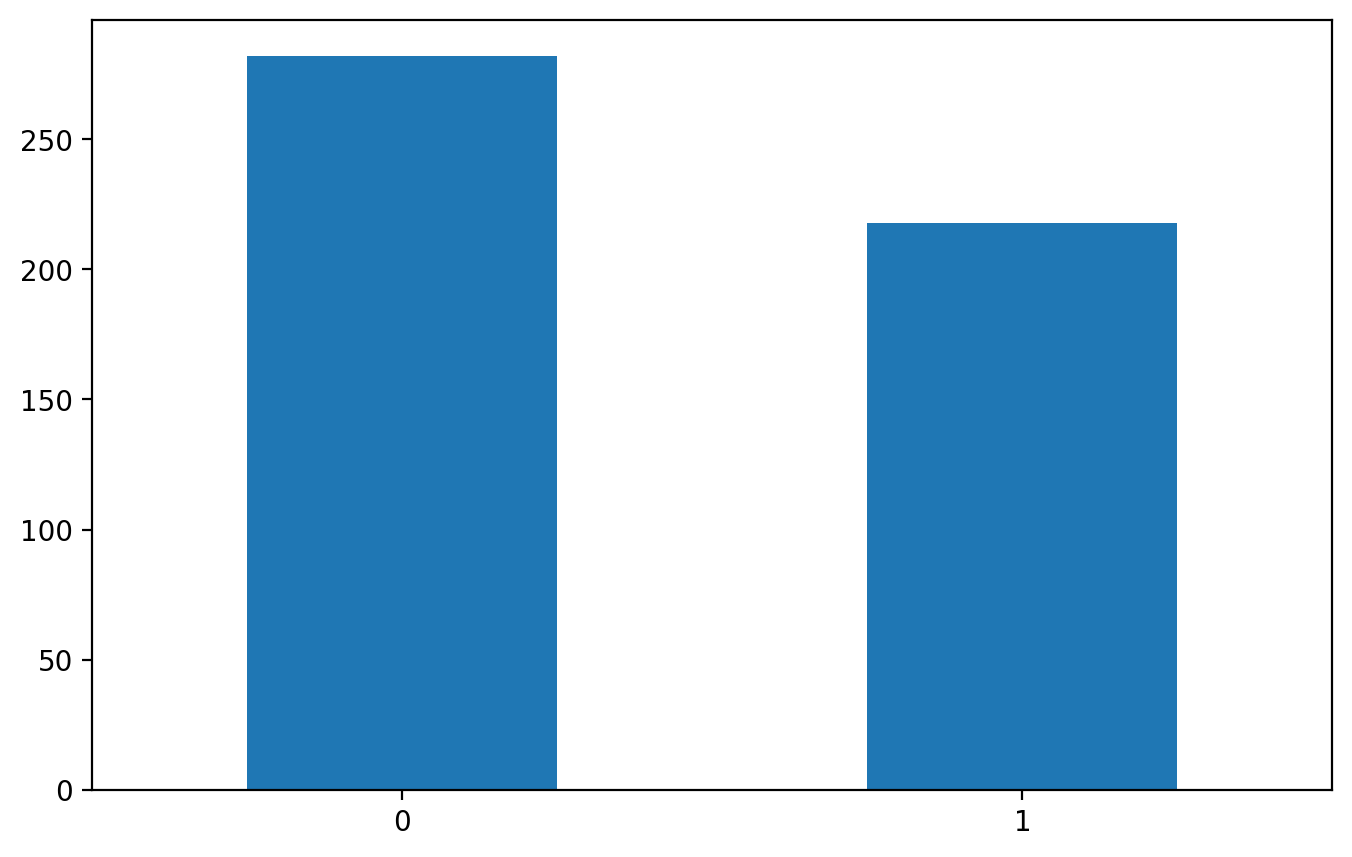

In [69]:
# Admit 변수 값 분포 확인
cmap=plt.get_cmap('tab10')
plt.figure(figsize=(8, 5))
data['ADMIT'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.show()

In [70]:
data.corr()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
GRE,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.701671
TOEFL,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.680503
RANK,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.618367
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.606876
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.536527
GPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.752196
RESEARCH,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.503104
ADMIT,0.701671,0.680503,0.618367,0.606876,0.536527,0.752196,0.503104,1.000000


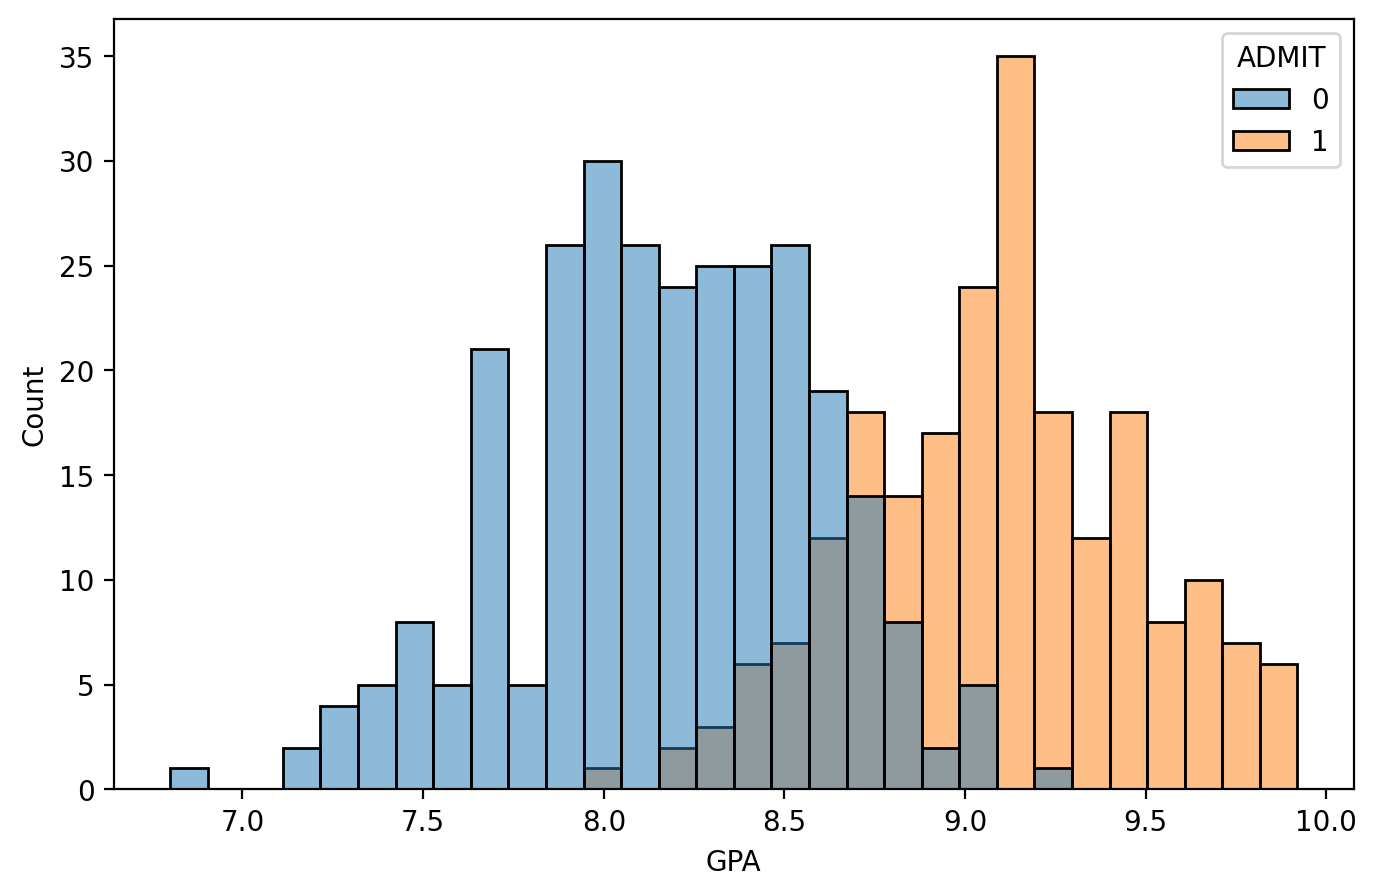

In [81]:
# GPA --> ADMIT 값 분포 확인
plt.figure(figsize=(8, 5))
sns.histplot(x=data['GPA'], hue=data['ADMIT'], bins=30)
plt.show()

In [72]:
# ADMIT 변수에 따라 분리
t = 'ADMIT'

# 데이터 분리
x = data.drop(t, axis=1)
y = data.loc[:, t]

In [73]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [74]:
# 라이브러리 불러오기 - KNN 모델링
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [75]:
# 모델 선언
model = KNeighborsClassifier()

In [76]:
# 학습
model.fit(x_train, y_train)

KNeighborsClassifier()

In [77]:
# 예측
y_pred = model.predict(x_test)

In [78]:
# 평가
print(accuracy_score(y_test, y_pred))

0.82
